# About Company

"**Company X** is a leading brand in the fitness equipment industry. It offers a wide product range including machines like treadmills, exercise bikes, gym equipment, and fitness accessories, catering to a diverse range of customers across various demographics."

# Scenario: 

The market research team at Company X wants to identify the characteristics of the target audience for each type of treadmill offered by the company. The goal is to provide more personalized recommendations for new customers. To achieve this, the team aims to investigate whether there are differences across the products concerning customer characteristics.

# Objective:

Conduct descriptive analytics to create a detailed customer profile for each treadmill product sold by Company X. This will involve developing appropriate tables and charts that display key customer characteristics.

# Method:

For each treadmill product, the following will be performed:

    Construct two-way contingency tables to analyze relationships between customer characteristics and treadmill types.
    Compute all conditional and marginal probabilities.
    Derive business insights from the results and assess their potential impact on decision-making for marketing and customer recommendations.

## Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week


# Product Portfolio:

    The KP281 is an entry-level treadmill that sells for $1,500.
    The KP481 is for mid-level runners that sell for $1,750.
    The KP781 treadmill is having advanced features that sell for $2,500.

## What we will try to do:

* Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
* Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
* Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
* Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
* Check correlation among different factors using heat maps or pair plots.
* With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
* Customer Profiling - Categorization of users.
* Probability- marginal, conditional probability.
* Some recommendations and actionable insights, based on the inferences.

In [56]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [57]:
df = pd.read_csv('fit_club.txt')

_There are 3 products treadmills mentioned which is of models:_

KP281(entry-level) --> $1,500

KP481 (mid-level)  --> $1,750

KP781 (adv features) --> $2,500

In [58]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [59]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [61]:
df.shape

(180, 9)

In [62]:
'''
Product
Age
Gender
Education
MaritalStatus
Usage
Fitness
Income
Miles

'''

'\nProduct\nAge\nGender\nEducation\nMaritalStatus\nUsage\nFitness\nIncome\nMiles\n\n'

In [63]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [64]:
df.describe(include= 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Observations:
- We can observe frome the above table that are as below:
- df has no missing values in data- the df is consist of 3 unique product and kP281 is the most frequently occuring product
- Total 180 data points, 104 are male, and the rest are female.
- The age ranges from 18 to 50 years, with an avg age of 28.79 years.
- Most individuals have 16 years of education, with 75% having 16 years or less.
- The standard deviation for both income and miles is very high, indicating the presence of potential outliers.

In [65]:
# Available unique products:

df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

    # As data seems to majorly clean, and sanitised we can directly jump to statistical analysis
    # If we see few columns like usage and fitness are like the numerical data types which basically should be of string to treat them accordingly.

In [66]:
df['Usage'] = df['Usage'].astype('str')
df['Fitness'] = df['Fitness'].astype('str')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


In [68]:
# Check for the duplicates:
df.duplicated().value_counts()

# Results are pointing that there are no rows which are duplicate in the data

False    180
Name: count, dtype: int64

In [69]:
# We can sagregate the data types wise the summary using describe: Object types and Integer types

In [70]:
# Object type
df.describe(include= 'object')

,Product,Gender,MaritalStatus,Usage,Fitness
count,180,180,180,180,180
unique,3,2,2,6,5
top,KP281,Male,Partnered,3,3
freq,80,104,107,69,97


## Observation:

* Highest sales reported in KP281 with 80 sold in the reported data, majority of buyers reported to be male i.e., around 104 out of 180 and  if we have to consider the marital status then 107 were married who purchased our product.

* Most of the buyers who purchased or products are belonged to the Usage and fitness category of 3 i.e., those who are planning to use the maching 3 times a week and are of average shape as 3 being average and 5 being excellent shape.


In [71]:
# Non- Object type of analysis
df.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


# Observations:

- Age - Min 18 to max 50 with avg of 28.79 years, with std of 6.9, having >75% of customers less than or equal to 33
- Education - Min 12 to max 21 with avg of 15.57 years, with std of 1.61 (No outlier exp), having >75% of customers less than or equal to 16.
- Income - if we see the std and 75% of total samples are below or equal to 50668 while max is 104581, which is indicating outliers to be present.
- Miles - if we see the std as 51 and 75% of total samples are below or equal to 114 while max is 360, which is indicating outliers to be present.

In [72]:
# We can check the list of unique values in the columns using teh loop:

for i in df.columns:
    print(i)
    print(df[i].unique())


Product
['KP281' 'KP481' 'KP781']
Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender
['Male' 'Female']
Education
[14 15 12 13 16 18 20 21]
MaritalStatus
['Single' 'Partnered']
Usage
['3' '2' '4' '5' '6' '7']
Fitness
['4' '3' '2' '1' '5']
Income
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


> As few columns are having contineous data like Age, Education, Income and Miles which we can better analyse if we convert that to the bins

In [73]:
# Age: As in above snip we can see the age is in the range of 18 to 42 then we can have ranges of as below for the bins

#binning the age values into categories
bin_age = [17,25,35,45, 55]
bin_agecat = ['Young', 'Adults', 'Adults+', 'Elder']

df['age Category'] = pd.cut(df['Age'],bins = bin_age,labels = bin_agecat)

In [74]:
# Education also needs kind of binning

bin_ed = [0,12,15,25]
bin_edcat = ['Primary', 'Secondary', 'Higher']

df['edu_class'] = pd.cut(df['Education'],bins = bin_ed,labels = bin_edcat)

In [75]:
# Incom binning

bin_inc =[0, 40000, 60000, 80000, 110000 ]
bin_incat = ['small', 'medium', 'high', 'very high']

df['inc_class'] = pd.cut(df['Income'], bins = bin_inc, labels=bin_incat)

In [76]:
# miles binning

bin_mils = [0, 50, 100, 200, 400]
bin_milscat = ['low', 'mod', 'high', 'very high']
df['miles_class'] = pd.cut(df['Miles'], bins = bin_mils, labels= bin_milscat)

In [77]:
# After binning the data below will be the structure for the dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age Category,edu_class,inc_class,miles_class
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Secondary,small,high
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Secondary,small,mod
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Secondary,small,mod
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Primary,small,mod
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Secondary,small,low


## Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

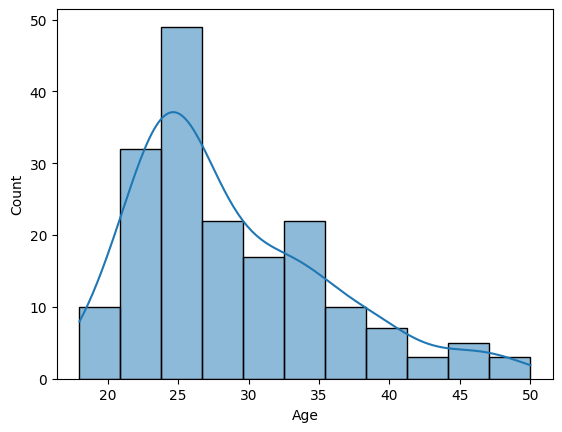

In [78]:
sns.histplot(data=df, x="Age", kde=True)

# Majority of the points are lying between 22.5 to 27.5

<Axes: xlabel='Education', ylabel='Count'>

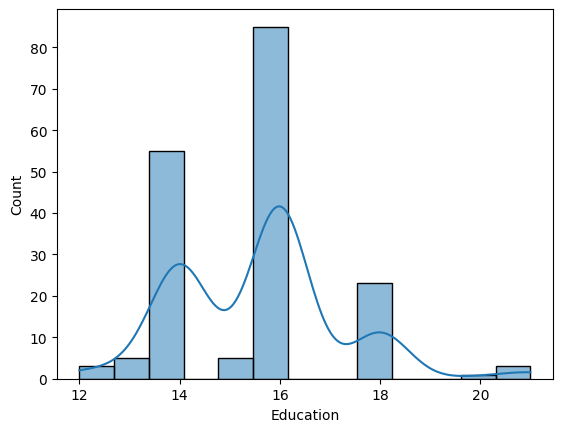

In [79]:
sns.histplot(data=df, x="Education", kde=True)

<Axes: xlabel='Usage', ylabel='Count'>

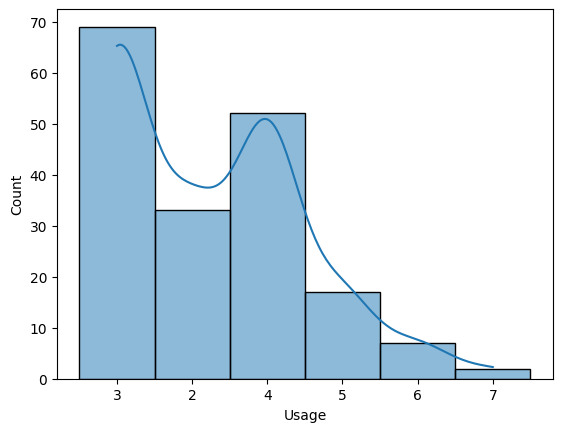

In [80]:
sns.histplot(data=df, x="Usage", kde=True)

<Axes: xlabel='Fitness', ylabel='Count'>

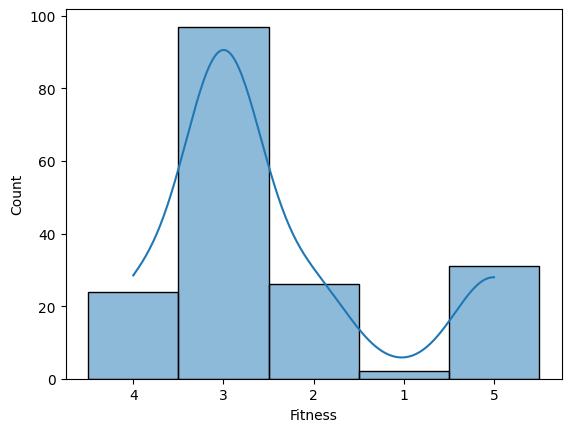

In [81]:
sns.histplot(data=df, x="Fitness", kde=True)

<Axes: xlabel='Income', ylabel='Count'>

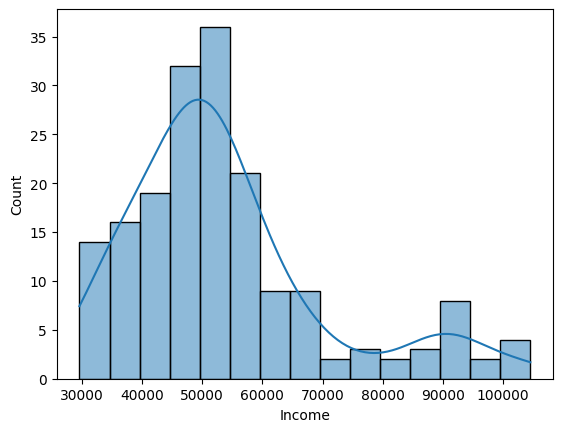

In [82]:
sns.histplot(data=df, x="Income", kde=True)
# Majorly the population belongs to the 45K to 55K

<Axes: xlabel='Miles', ylabel='Count'>

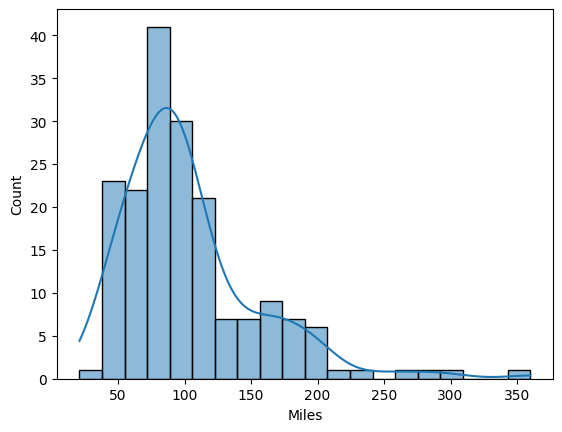

In [83]:
sns.histplot(data=df, x="Miles", kde=True)

# Observation :

> Age data is rightly skewed whcich will be pointing otliers possible on the higher side of the age range with major people belongs to 22.5 to 25 years

> Frequent users are from the category 3 and 4 which we need to more focus on

> Fitness wise the people mostly belongs to category 3

> Income wise majority of our samples are in the range of 45K to 55K with the right skewed data

> Miles that they will run are 50 to 120 per week

## Outliers detection : Box-Plot

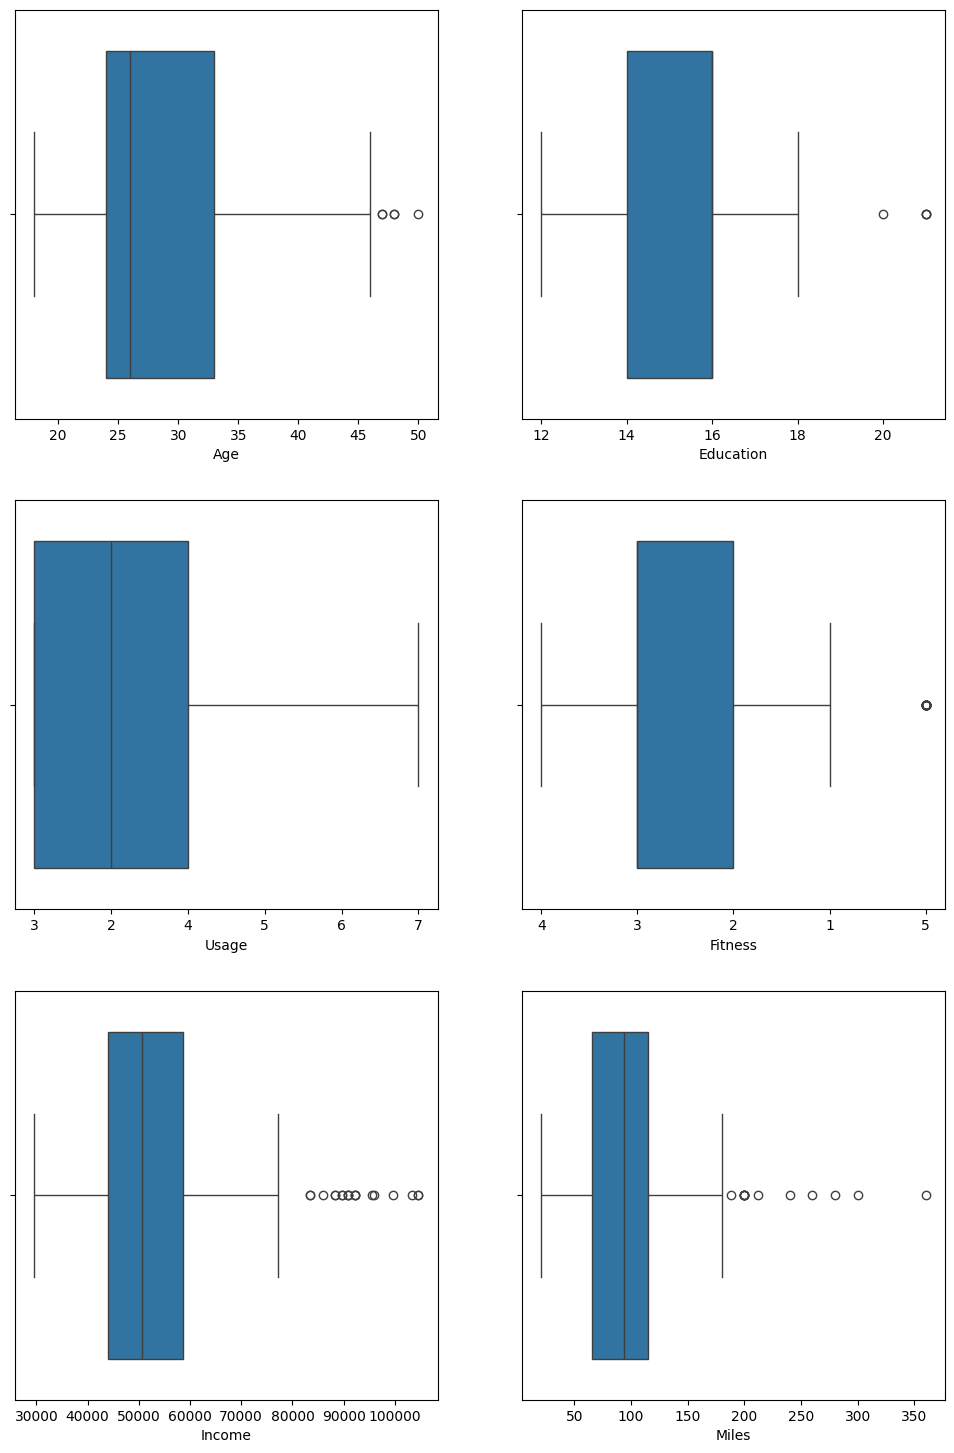

In [84]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.5)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

# In below tables we can see that there are outliers present in few columns that are Age, Educations, Fitness, income and miles


# Observation:

> Visually w can observe that there are few outliers present in Fitness, Age and Eucation and more outliers present in Income and Miles while no outliers seen in usage

In [85]:
# Product wise share in total collected records

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age Category,edu_class,inc_class,miles_class
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Secondary,small,high
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Secondary,small,mod
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Secondary,small,mod
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Primary,small,mod
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Secondary,small,low


In [86]:
# Discreate variables

# Best way to show the spread among the various products is pie chart

product_count1 = df['Product'].value_counts()
product_count = df['Product'].value_counts(normalize= True)*100
print(product_count)

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64


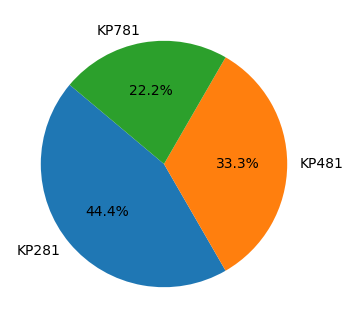

In [87]:
plt.figure(figsize=(4, 4))
plt.pie(product_count1, labels=product_count1.index, autopct='%1.1f%%', startangle=140)
plt.show()

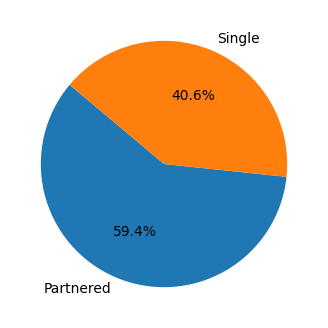

In [88]:
#  Similarly we can also showcase the spread of samples collected by the gender

Marital_count1 = df['MaritalStatus'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(Marital_count1, labels=Marital_count1.index, autopct='%1.1f%%', startangle=140)
plt.show()

<Axes: xlabel='Product', ylabel='count'>

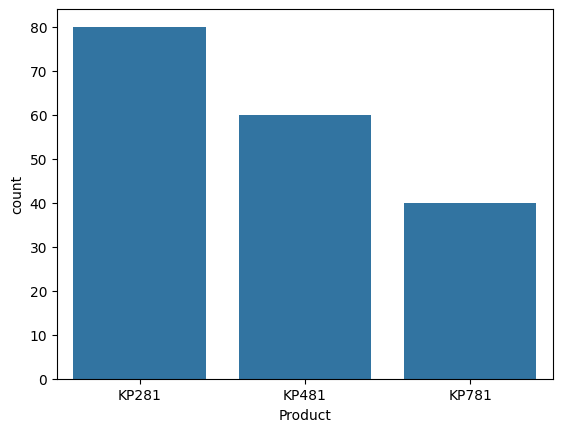

In [89]:
sns.barplot(product_count1)

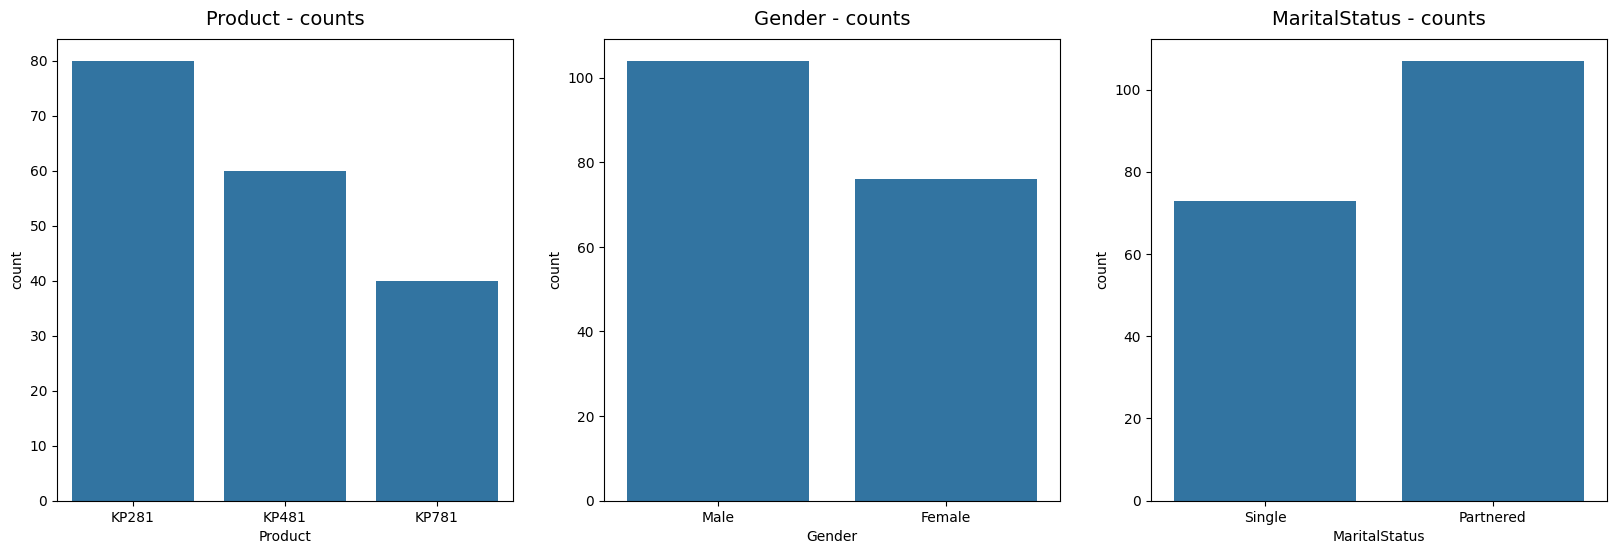

In [90]:
# Countplots to see the counts of different values in each discreate variables

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

In [91]:
df_melted = df[['Product', 'Gender', 'MaritalStatus', 'Fitness', 'Usage']].melt()
df_2 = df_melted.groupby(['variable', 'value'])[['value']].count() / len(df)*100
df_2

value
variable      value               
Fitness       1           1.111111
              2          14.444444
              3          53.888889
              4          13.333333
              5          17.222222
Gender        Female     42.222222
              Male       57.777778
MaritalStatus Partnered  59.444444
              Single     40.555556
Product       KP281      44.444444
              KP481      33.333333
              KP781      22.222222
Usage         2          18.333333
              3          38.333333
              4          28.888889
              5           9.444444
              6           3.888889
              7           1.111111

# Observation: 

> We can observe from the above table that almost 54% people who are purchasing are falls under fiteness category 3 which means niether too poor or too excelent in terms of shape.

> 58% of total who are purchasing are males and 60% are married people.

> Product model no KP281 is most polular product among all three products which is reporting almost 44% of total sales share.

> And if we compare the customers according t their intentional usage, they mostly fall under the 3 times per week which is almost 38 folloed by 4 times/week.


In [92]:
usage_count = df['Usage'].value_counts().sort_values(ascending= False)
Fitness_count = df['Fitness'].value_counts().sort_values(ascending= False)

usage_count, Fitness_count

(Usage
 3    69
 4    52
 2    33
 5    17
 6     7
 7     2
 Name: count, dtype: int64,
 Fitness
 3    97
 5    31
 2    26
 4    24
 1     2
 Name: count, dtype: int64)

C:\Users\chavad\AppData\Local\Temp\ipykernel_20056\63306537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usage_count.values, y=usage_count.index, palette='viridis')


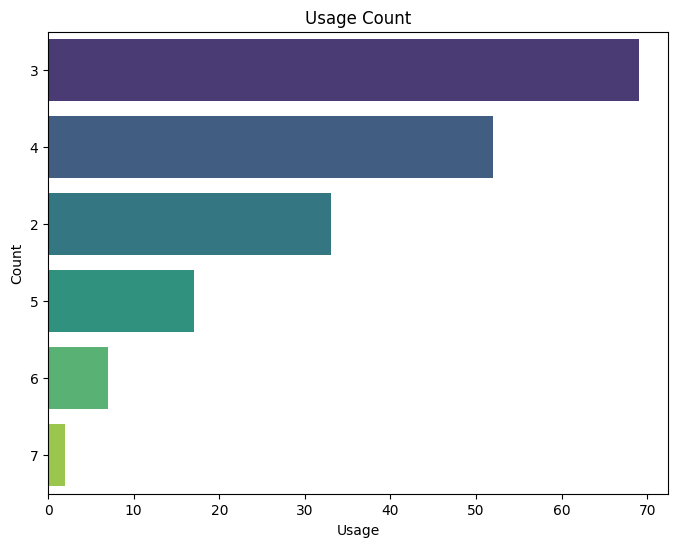

In [93]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.barplot(x=usage_count.values, y=usage_count.index, palette='viridis')
plt.title('Usage Count')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.show()

C:\Users\chavad\AppData\Local\Temp\ipykernel_20056\3367085388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Fitness_count.values, y=Fitness_count.index, palette='viridis')


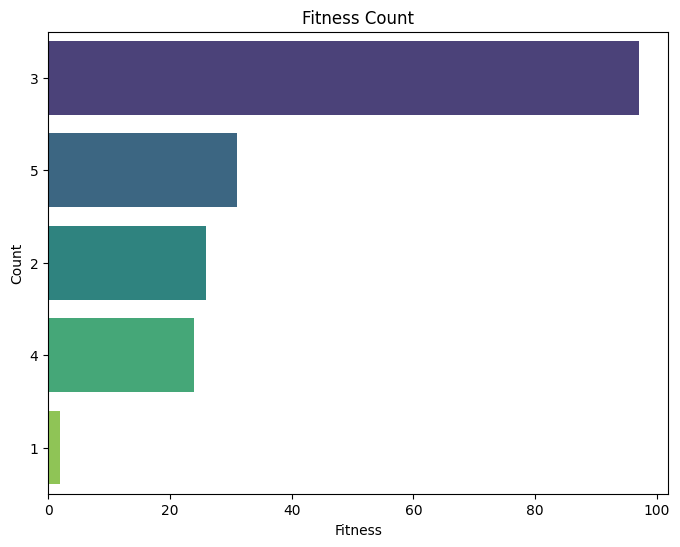

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Fitness_count.values, y=Fitness_count.index, palette='viridis')
plt.title('Fitness Count')
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.show()

In [95]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age Category,edu_class,inc_class,miles_class
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Secondary,small,high
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Secondary,small,mod
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Secondary,small,mod
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Primary,small,mod
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Secondary,small,low


<Axes: xlabel='miles_class', ylabel='count'>

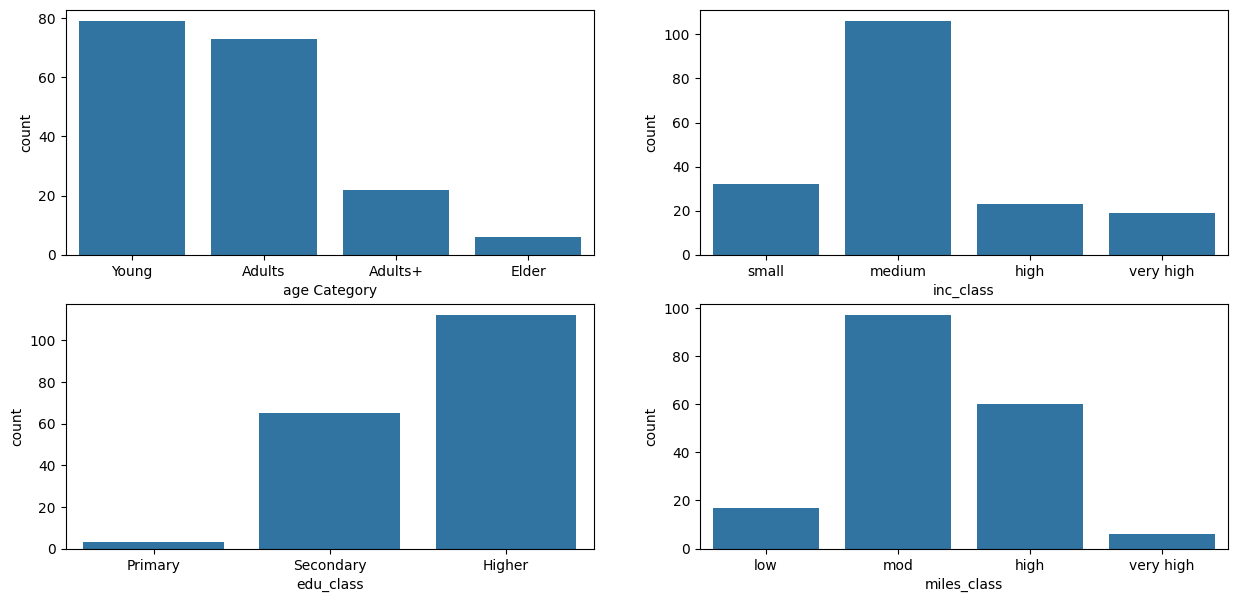

In [96]:
fig = plt.figure(figsize = (15,7))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
sns.countplot(data= df, x = 'age Category')
ax2 = fig.add_subplot(gs[1,0])
sns.countplot(data= df, x = 'edu_class')
ax2 = fig.add_subplot(gs[0,1])
sns.countplot(data= df, x = 'inc_class')
ax2 = fig.add_subplot(gs[1,1])
sns.countplot(data= df, x = 'miles_class')

### 🔍 Insights

- Young adults category of the customers both are equally interested in purcahsing the equipments.

- Majority of purchasers belongs to the income groups of medium size ranging from 40 to 60K followed by small i.e <40K.

- Education with the Secondary and Higher clases are more interested purchasing the equipments.

- Also the people who are purchasing are of miles class mod and high.

C:\Users\chavad\AppData\Local\Temp\ipykernel_20056\3191481928.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Product'].unique(), fontweight='bold')
C:\Users\chavad\AppData\Local\Temp\ipykernel_20056\3191481928.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Product'].unique(), fontweight='bold')
C:\Users\chavad\AppData\Local\Temp\ipykernel_20056\3191481928.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Product'].unique(), fontweight='bold')
C:\Users\chavad\AppData\Local\Temp\ipykernel_20056\3191481928.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

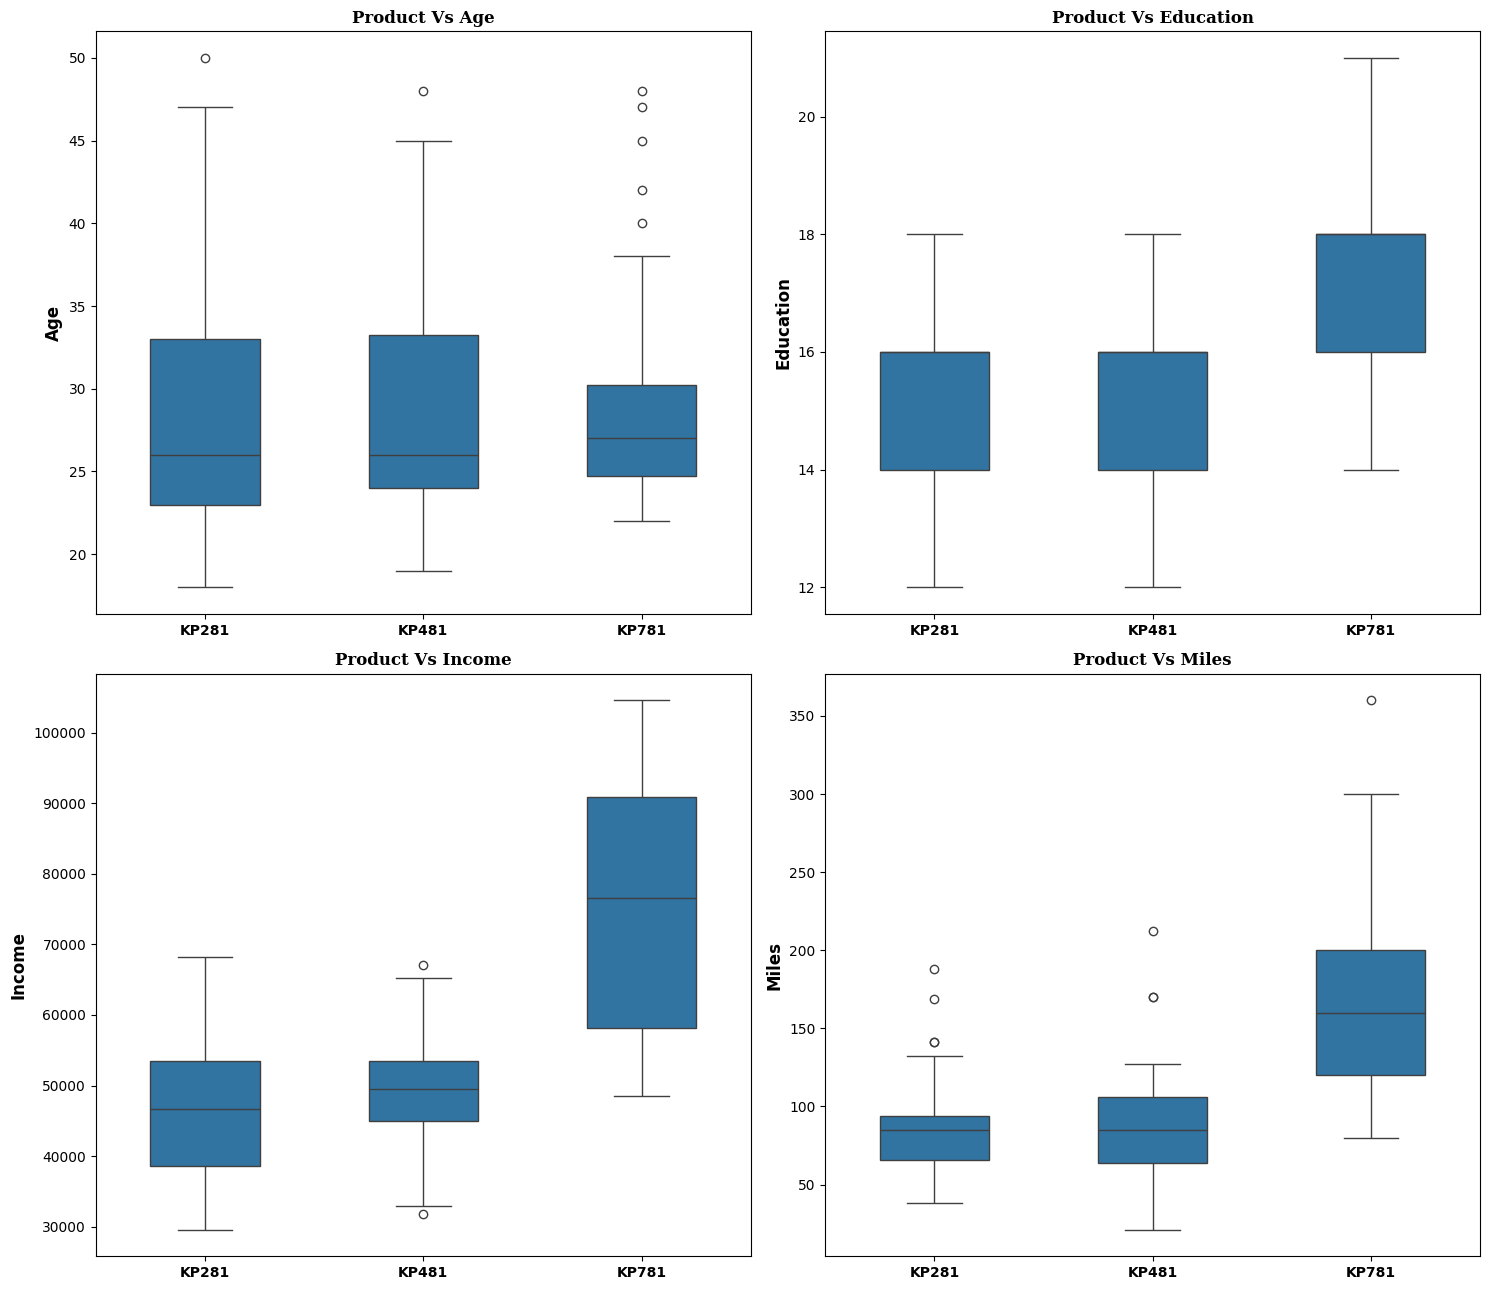

In [97]:
# Define the order of plots and corresponding titles
plot_order = [(0, 0, 'Age', 'Age'), (0, 1, 'Education', 'Education'), 
              (1, 0, 'Income', 'Income'), (1, 1, 'Miles', 'Miles')]

# Create the figure and grid layout
fig = plt.figure(figsize=(15, 13))
gs = fig.add_gridspec(2, 2)
for i, j, k, title in plot_order:
    # Plot position
    ax = fig.add_subplot(gs[i, j])
    # Plot using Seaborn's boxplot
    sns.boxplot(data=df, x='Product', y=k, ax=ax, width=0.5)
    # Set plot title
    ax.set_title(f'Product Vs {title}', {'font': 'serif', 'size': 12, 'weight': 'bold'})
     # Customize axes
    ax.set_xticklabels(df['Product'].unique(), fontweight='bold')
    ax.set_ylabel(f'{title}', fontweight='bold', fontsize=12)
    ax.set_xlabel('')

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

## Observation

- We can clearly see that with higher education, Income and Miles the prefference for the KP781 is higher while that is also preffred by the young people that is people in the range of 22.5 to 37.5 

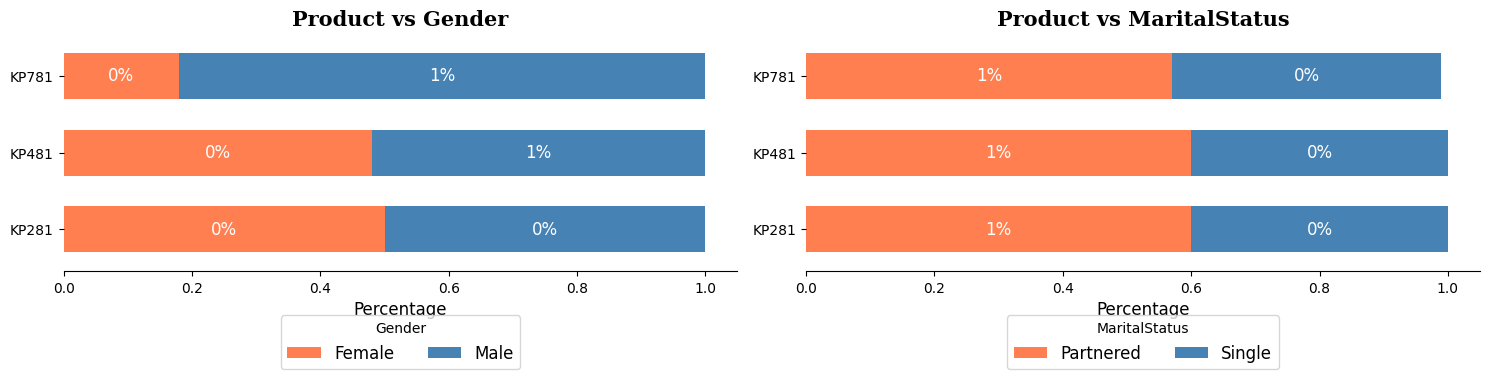

In [116]:
# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

color_palette = ["#FF7F50", "#4682B4"]

columns = ['Gender', 'MaritalStatus']

for ax, col in zip(axs, columns):
    
    df_grp = df.groupby('Product')[col].value_counts(normalize=True).round(2).unstack().fillna(0)
    
    df_grp.plot(kind='barh', stacked=True, ax=ax, color=color_palette, width=0.6, edgecolor='none')
    
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fmt='%.0f%%', fontsize=12, color='white')

    ax.set_title(f'Product vs {col}', fontsize=15, fontweight='bold', fontfamily='serif')
    ax.set_xlabel('Percentage', fontsize=12)
    ax.set_ylabel('')  # Hide the default y-axis label
    ax.spines[['top', 'right', 'left']].set_visible(False)  # Remove spines for a cleaner look
    ax.legend(title=col, loc='upper center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout()

plt.show()

## Observation:

- Males are main contributor for 781 purchase while in rest all models the contribution is more or less same
- on an average married people have equal prefferences in all 3 categories for product type.

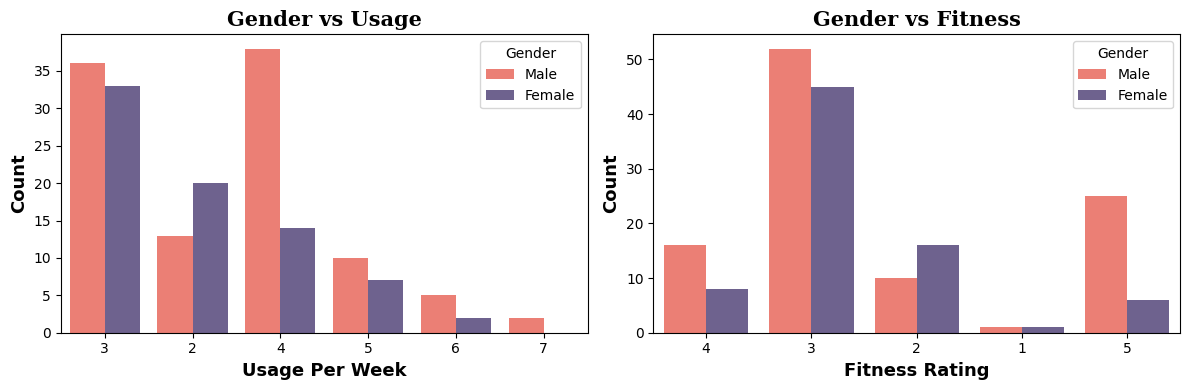

In [117]:
# Plotting Gender vs Usage and Fitness
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Gender vs Usage
sns.countplot(data=df, x='Usage', hue='Gender', palette=["#FF6F61", "#6B5B95"], ax=axs[0])
axs[0].set_title('Gender vs Usage', fontsize=15, fontweight='bold', fontfamily='serif')
axs[0].set_xlabel('Usage Per Week', fontsize=13, fontweight='bold')
axs[0].set_ylabel('Count', fontsize=13, fontweight='bold')
axs[0].legend(title='Gender', loc='upper right')

# Gender vs Fitness
sns.countplot(data=df, x='Fitness', hue='Gender', palette=["#FF6F61", "#6B5B95"], ax=axs[1])
axs[1].set_title('Gender vs Fitness', fontsize=15, fontweight='bold', fontfamily='serif')
axs[1].set_xlabel('Fitness Rating', fontsize=13, fontweight='bold')
axs[1].set_ylabel('Count', fontsize=13, fontweight='bold')
axs[1].legend(title='Gender', loc='upper right')

fig.tight_layout()

plt.show()

## Observation
- Only category whcih has female dominance is the user group which want to use twice a week, in rest all user groups males are dominant
- 3 times a week has closer diff between male and feemale in terms of user shares
- 4 time a week has bigger difference between the no of males and females, in terms of purchase and use
- If we consider the type of physique, out of total people who are purchasing belongs to the average/ middle kind of physique.

## Pairplot for Corelation Checks

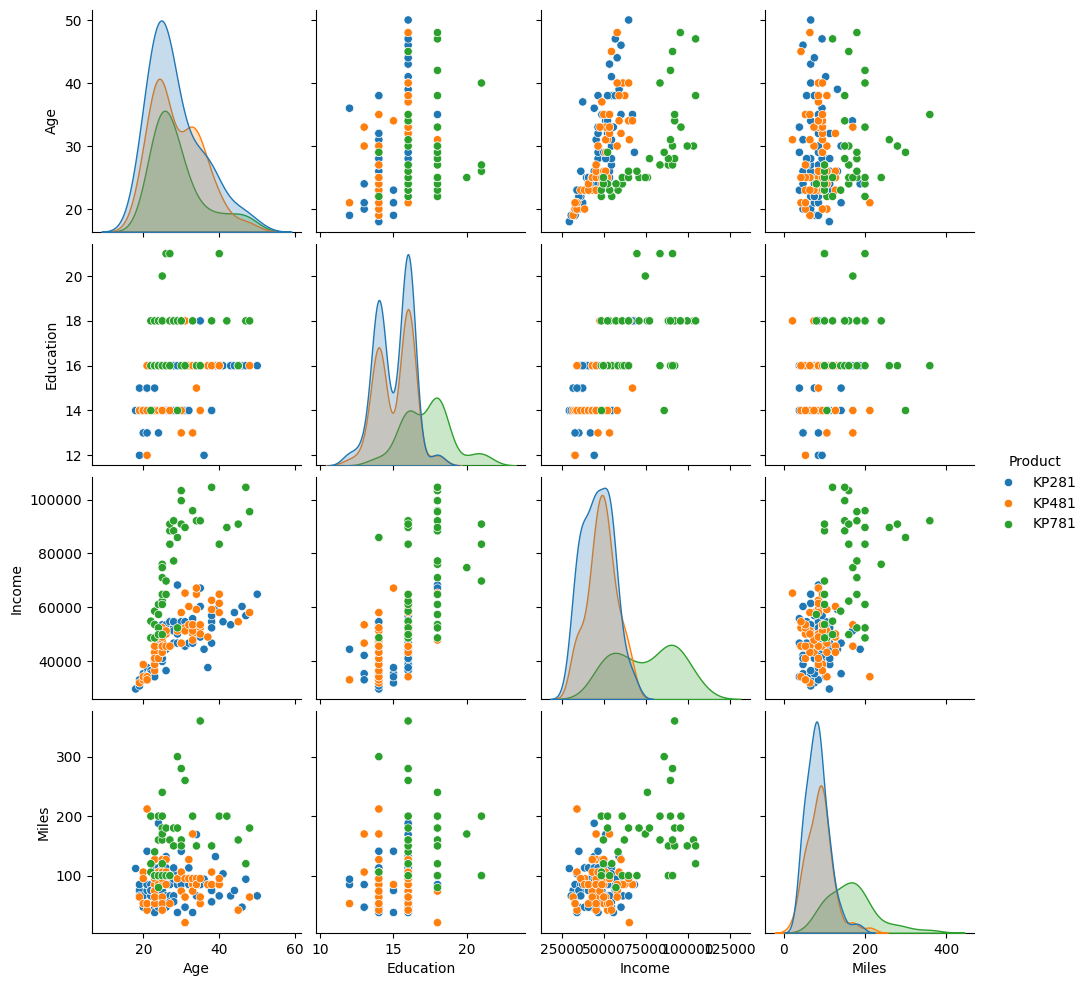

In [118]:
sns.pairplot(df, hue ='Product')
plt.show()

# Observation

> If u see the income vs age scatter plot that will show slight +ve correlation which we can furthre cross check by values using Heatmap

## Heatmap
- First we need to convert the object data type for usage and fitness columns which we have changed as the 'Str' type


In [101]:
df_copy = copy.deepcopy(df[['Age','Education','Usage','Fitness','Income','Miles']])
df_copy['Usage'] = df_copy['Usage'].astype('int')
df_copy['Fitness'] = df_copy['Fitness'].astype('int')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        180 non-null    int64
 1   Education  180 non-null    int64
 2   Usage      180 non-null    int32
 3   Fitness    180 non-null    int32
 4   Income     180 non-null    int64
 5   Miles      180 non-null    int64
dtypes: int32(2), int64(4)
memory usage: 7.2 KB


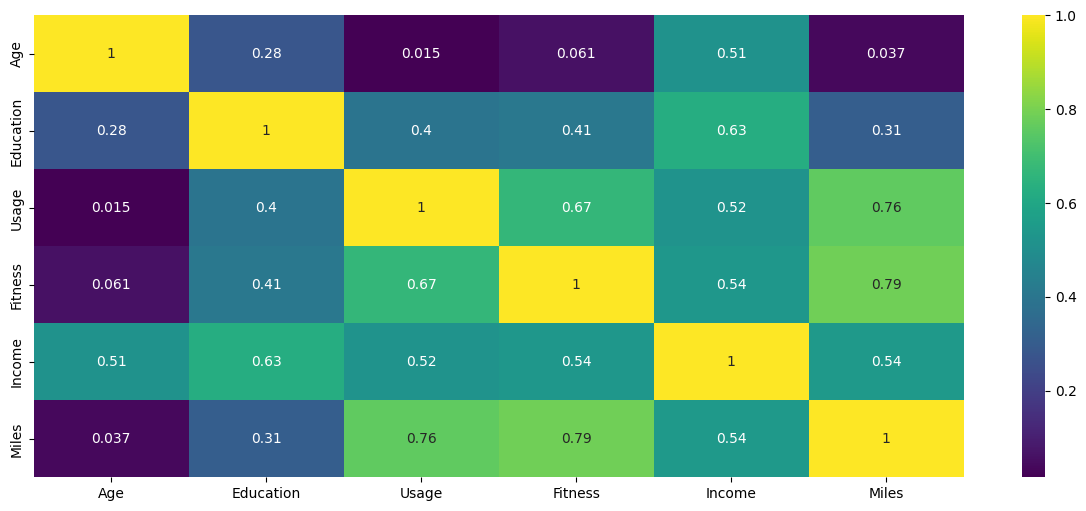

In [102]:
corr_mat = df_copy.corr()

plt.figure(figsize=(15,6))

sns.heatmap(corr_mat,annot = True, cmap='viridis')

plt.show()

## Observation for Heatmap and Pairplot shows:
- The pair plot shows a positive correlation between Age vs Income, which has been reconfirmed with the heatmap

- Usage is highly correlated with Fitness and Miles, as increased usage leads to higher fitness levels and greater mileage.

- Education vs Income has high correlation and its understood too

- Education has a significant correlation with both Fitness and Usage.

## Statistical Analysis regarding the probability

In [103]:
# Products vs Gender Probability
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


## Observation

- Above table shows the probability of varius incidences like probability of purchasing the KP281 given that th customer is femal will be 22%
- Similarly we can read others too

In [104]:
# Products vs Education class probability
pd.crosstab(index =df['Product'],columns = df['edu_class'],margins = True,normalize = True ).round(2)

edu_class,Primary,Secondary,Higher,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


- Probability being the purchaser choosing the KP481 given tht the purchaser is having secondary education will be 14%

In [105]:
# Products vs Age category probability
pd.crosstab(index =df['Product'],columns = df['age Category'],margins = True,normalize = True ).round(2)

age Category,Young,Adults,Adults+,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


In [106]:
# Products vs Marital status probability
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


In [107]:
# Products vs Income class probability
pd.crosstab(index =df['Product'],columns = df['inc_class'],margins = True,normalize = True ).round(2)

inc_class,small,medium,high,very high,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


In [108]:
# Products vs Usage probability
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


In [109]:
# Products vs Fitness probability
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


In [110]:
# Products vs Miles class probability
pd.crosstab(index =df['Product'],columns = df['miles_class'],margins = True,normalize = True ).round(2)

miles_class,low,mod,high,very high,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


## Recomendations and Suggestions

- The likelihood of purchase is 44% for KP281, 33% for KP481, and 22% for KP781.

- Customers are predominantly aged between the range of 18 - 35 years and runs 50 to 100 miles per week.

- Customers have at least 13 years of education and have an annual income of less than USD 60,000.

- Customers use the treadmill 2 to 3 times per week while major people who are purchasing the equipments belongs to Fitness category of '3'

## Suggestion

- Majorly if we see the data lower income groups and lower eductaion level are contributing lesser share for which we can target those customers
    - We can provide them with the better monetory plan to invest in halth and less educated needs to eductaed using campaign
    - Also major share of KP281 indicates that is price driven as mostly middle income bracket is investing, whome we can push to buy better machine with   some better installments plan
    - Also if we see that KP781 is popular in males its having majro disaparity wrt females, it seems its unpopular and we can probe further into this why?and is there other reason than price?
    - KP781 if we see is popular in the people with the higher eductaion, higher income and higher miles capacity. while 281 is popular across the broader range of age groups.  